In [1]:
import numpy as np

In [2]:
import os
os.environ["MKL_THREADING_LAYER"] = "GNU"

In [3]:
from keras.utils import np_utils

Using Theano backend.


In [4]:
import keras.preprocessing.sequence as sq

In [5]:
npzdata=np.load("data.npz")

In [6]:
npzdata

In [7]:
data=npzdata['data']
labels=npzdata['labels']

In [8]:
print(data)
len(data)

[[ 1  1 -1 ... -1 -1 -1]
 [ 1  1 -1 ... -1 -1 -1]
 [ 1  1 -1 ... -1 -1 -1]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


249996

In [9]:
print(labels)
len(labels)

[u'9gag.com' u'9gag.com' u'9gag.com' ... None None None]


249996

In [10]:
data.shape

(249996L, 5000L)

In [11]:
maxlen=150

In [12]:
data=sq.pad_sequences(data,maxlen=maxlen,padding='post',truncating='post',dtype='float64')

In [13]:
data=data.reshape(data.shape[0],data.shape[1],1)

In [14]:
dict_label={}

In [15]:
n=0

In [16]:
set_labels=list(set(labels))

In [17]:
for l in set_labels:
    dict_label[l]=n
    n+=1

In [18]:
dict_label

{None: 33,
 u'9gag.com': 77,
 u'abs-cbn.com': 99,
 u'adf.ly': 70,
 u'adobe.com': 40,
 u'aliexpress.com': 22,
 u'allegro.pl': 83,
 u'amazon.com': 50,
 u'amazonaws.com': 62,
 u'aol.com': 72,
 u'apple.com': 69,
 u'archive.org': 9,
 u'askcom.me': 71,
 u'battle.net': 96,
 u'blastingnews.com': 7,
 u'booking.com': 57,
 u'breitbart.com': 76,
 u'bukalapak.com': 21,
 u'businessinsider.com': 48,
 u'conservativetribune.com': 56,
 u'dailymail.co.uk': 61,
 u'dailymotion.com': 29,
 u'detik.com': 59,
 u'deviantart.com': 82,
 u'dictionary.com': 27,
 u'digikala.com': 36,
 u'doubleclick.net': 25,
 u'doublepimp.com': 89,
 u'ebay.com': 49,
 u'espncricinfo.com': 5,
 u'exoclick.com': 55,
 u'extratorrent.cc': 64,
 u'facebook.com': 88,
 u'feedly.com': 32,
 u'gamepedia.com': 95,
 u'github.com': 15,
 u'go.com': 94,
 u'godaddy.com': 93,
 u'goodreads.com': 81,
 u'google.com': 98,
 u'hclips.com': 28,
 u'hola.com': 24,
 u'hotmovs.com': 78,
 u'imdb.com': 97,
 u'instructure.com': 80,
 u'intuit.com': 38,
 u'kompas.com'

In [19]:
labels_new=[]

In [20]:
for l in labels:
    labels_new.append(dict_label[l])

In [21]:
label_1=np_utils.to_categorical(labels_new)

In [60]:
label_1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
def generateData(data,labels,batch_size=32):
    nb_instances = data.shape[0]
    nb_classes = labels.shape[1]
    sample_shape = data[0].shape
    batch_data_shape = tuple([batch_size] + list(sample_shape))
    batch_label_shape = (batch_size, nb_classes)
    print(batch_data_shape)
    print(batch_label_shape)
    # Infinite loop
    while True:
        # Generate an exploration order
        indices = np.arange(nb_instances)
        np.random.shuffle(indices)

        # Generate batches
        imax = int(len(indices) / batch_size)
        for i in range(imax):
            # Form a batch
            x = np.empty(batch_data_shape)
            y = np.empty(batch_label_shape)
            for j, k in enumerate(indices[i * batch_size: (i + 1) * batch_size]):
                x[j] = data[k]
                y[j] = labels[k]
            if x.shape != batch_data_shape:
                print(x.shape)
                exit(0)
            yield x, y

In [44]:
temp=generateData(data,label_1)

In [46]:
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Input
from keras.models import Sequential
from keras.optimizers import RMSprop

In [47]:
model=Sequential()

In [48]:
input_length=maxlen
input_dim=1

In [49]:
model.add(LSTM(input_shape=(input_length,input_dim),units=128,activation='tanh',recurrent_activation='hard_sigmoid',return_sequences=True,dropout=0.2))

C:\Users\jatin\Anaconda3\envs\SmartEnergy\lib\site-packages\keras\layers\recurrent.py:2155: UserWarning: RNN dropout is no longer supported with the Theano backend due to technical limitations. You can either set `dropout` and `recurrent_dropout` to 0, or use the TensorFlow backend.
  'RNN dropout is no longer supported with the Theano backend '


In [50]:
model.add(LSTM(units=128,activation='tanh',recurrent_activation='hard_sigmoid',return_sequences=False,dropout=0.2))

In [51]:
nb_classes=label_1.shape[1]

In [52]:
nb_classes

101L

In [53]:
model.add(Dense(units=nb_classes,activation='softmax'))

In [54]:
metrics=['accuracy']

In [55]:
optimizer=RMSprop(lr=0.001,decay=0.0)

In [56]:
model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=metrics)

In [57]:
print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150, 128)          66560     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 101L)              13029     
Total params: 211,173
Trainable params: 211,173
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
from sklearn import model_selection

In [63]:
X_train, x_test, Y_train, y_test = model_selection.train_test_split(data, label_1, test_size=0.15)

In [64]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(X_train, Y_train, test_size=0.18)

In [65]:
trainGen=generateData(x_train,y_train)

In [66]:
valGen=generateData(x_val,y_val)

In [67]:
testGen=generateData(x_test,y_test)

In [68]:
# Ques. Why are we doing the following in the batch size of 32 ?
history=model.fit_generator(generator=trainGen,steps_per_epoch=x_train.shape[0]//32,validation_data=valGen,validation_steps=x_val.shape[0]//32,epochs=5)

C:\Users\jatin\Anaconda3\envs\SmartEnergy\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\jatin\Anaconda3\envs\SmartEnergy\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\jatin\Anaconda3\envs\SmartEnergy\lib\site-packages\theano\scan_module\scan_perform_ext.py:7

Epoch 1/5
(32, 150L, 1L)
(32, 101L)
(32, 150L, 1L)
(32, 101L)
5445/5445 [==============================] - 2694s 495ms/step - loss: 2.4506 - acc: 0.3714 - val_loss: 1.3860 - val_acc: 0.6255
Epoch 2/5
5445/5445 [==============================] - 2266s 416ms/step - loss: 1.1893 - acc: 0.6766 - val_loss: 0.9288 - val_acc: 0.7458
Epoch 3/5
5445/5445 [==============================] - 2279s 418ms/step - loss: 0.8277 - acc: 0.7755 - val_loss: 0.7447 - val_acc: 0.7946
Epoch 4/5
5445/5445 [==============================] - 2294s 421ms/step - loss: 0.6628 - acc: 0.8181 - val_loss: 0.6082 - val_acc: 0.8356
Epoch 5/5
5445/5445 [==============================] - 2308s 424ms/step - loss: 0.5794 - acc: 0.8420 - val_loss: 0.5633 - val_acc: 0.8467


In [69]:
import matplotlib.pyplot as plt

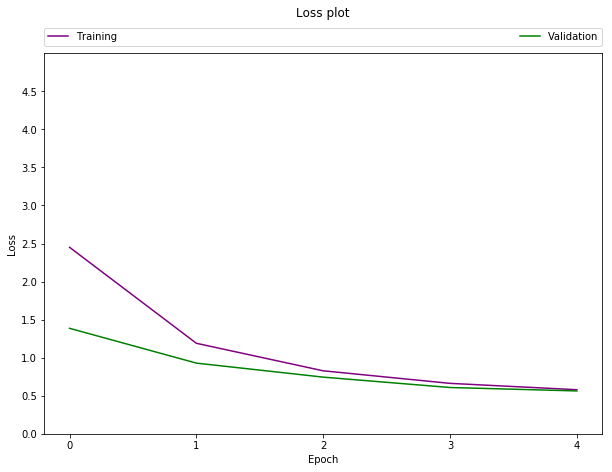

In [70]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label="Training", color='purple')
if history.history['val_loss'] is not None:
    plt.ylim(0, 5)
    plt.plot(history.history['val_loss'], label="Validation", color='green')
plt.title("Loss plot", y=1.08)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode='expand', borderaxespad=0.)
plt.yticks(np.arange(0, 5, 0.5))
plt.xticks(np.arange(0, 5, 1))
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

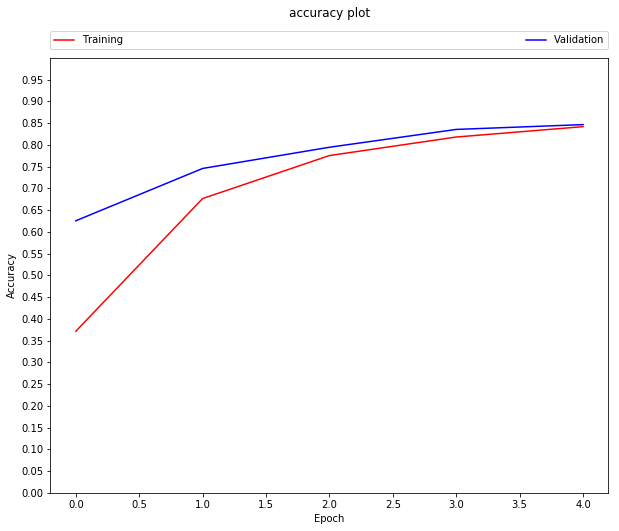

In [71]:
plt.figure(figsize=(10, 8))
plt.ylim(0, 1)
plt.plot(history.history['acc'], label="Training", color='red')
if history.history['val_acc'] is not None:
    plt.plot(history.history['val_acc'], label="Validation", color='blue')
plt.title("accuracy plot", y=1.08)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode='expand', borderaxespad=0.)
plt.yticks(np.arange(0, 1, 0.05))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [72]:
steps = x_test.shape[0]//32
scores = model.evaluate_generator(testGen, steps)
predicted = model.predict_generator(testGen, steps)

(32, 150L, 1L)
(32, 101L)


C:\Users\jatin\Anaconda3\envs\SmartEnergy\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\jatin\Anaconda3\envs\SmartEnergy\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"


In [73]:
test_loss = round(scores[0], 4)
test_acc = round(scores[1], 4)

In [74]:
test_loss

0.5671

In [75]:
test_acc

0.8479